In [ ]:
import tensorflow as tf
import pandas as pd # reding and processing data
import seaborn as sns # visualization
from keras import layers ,losses, optimizers, metrics,utils
import matplotlib.pyplot as plt
import numpy as np
import graphviz


In [2]:
data = pd.read_csv("train.csv",)
data.shape

(1000, 12)

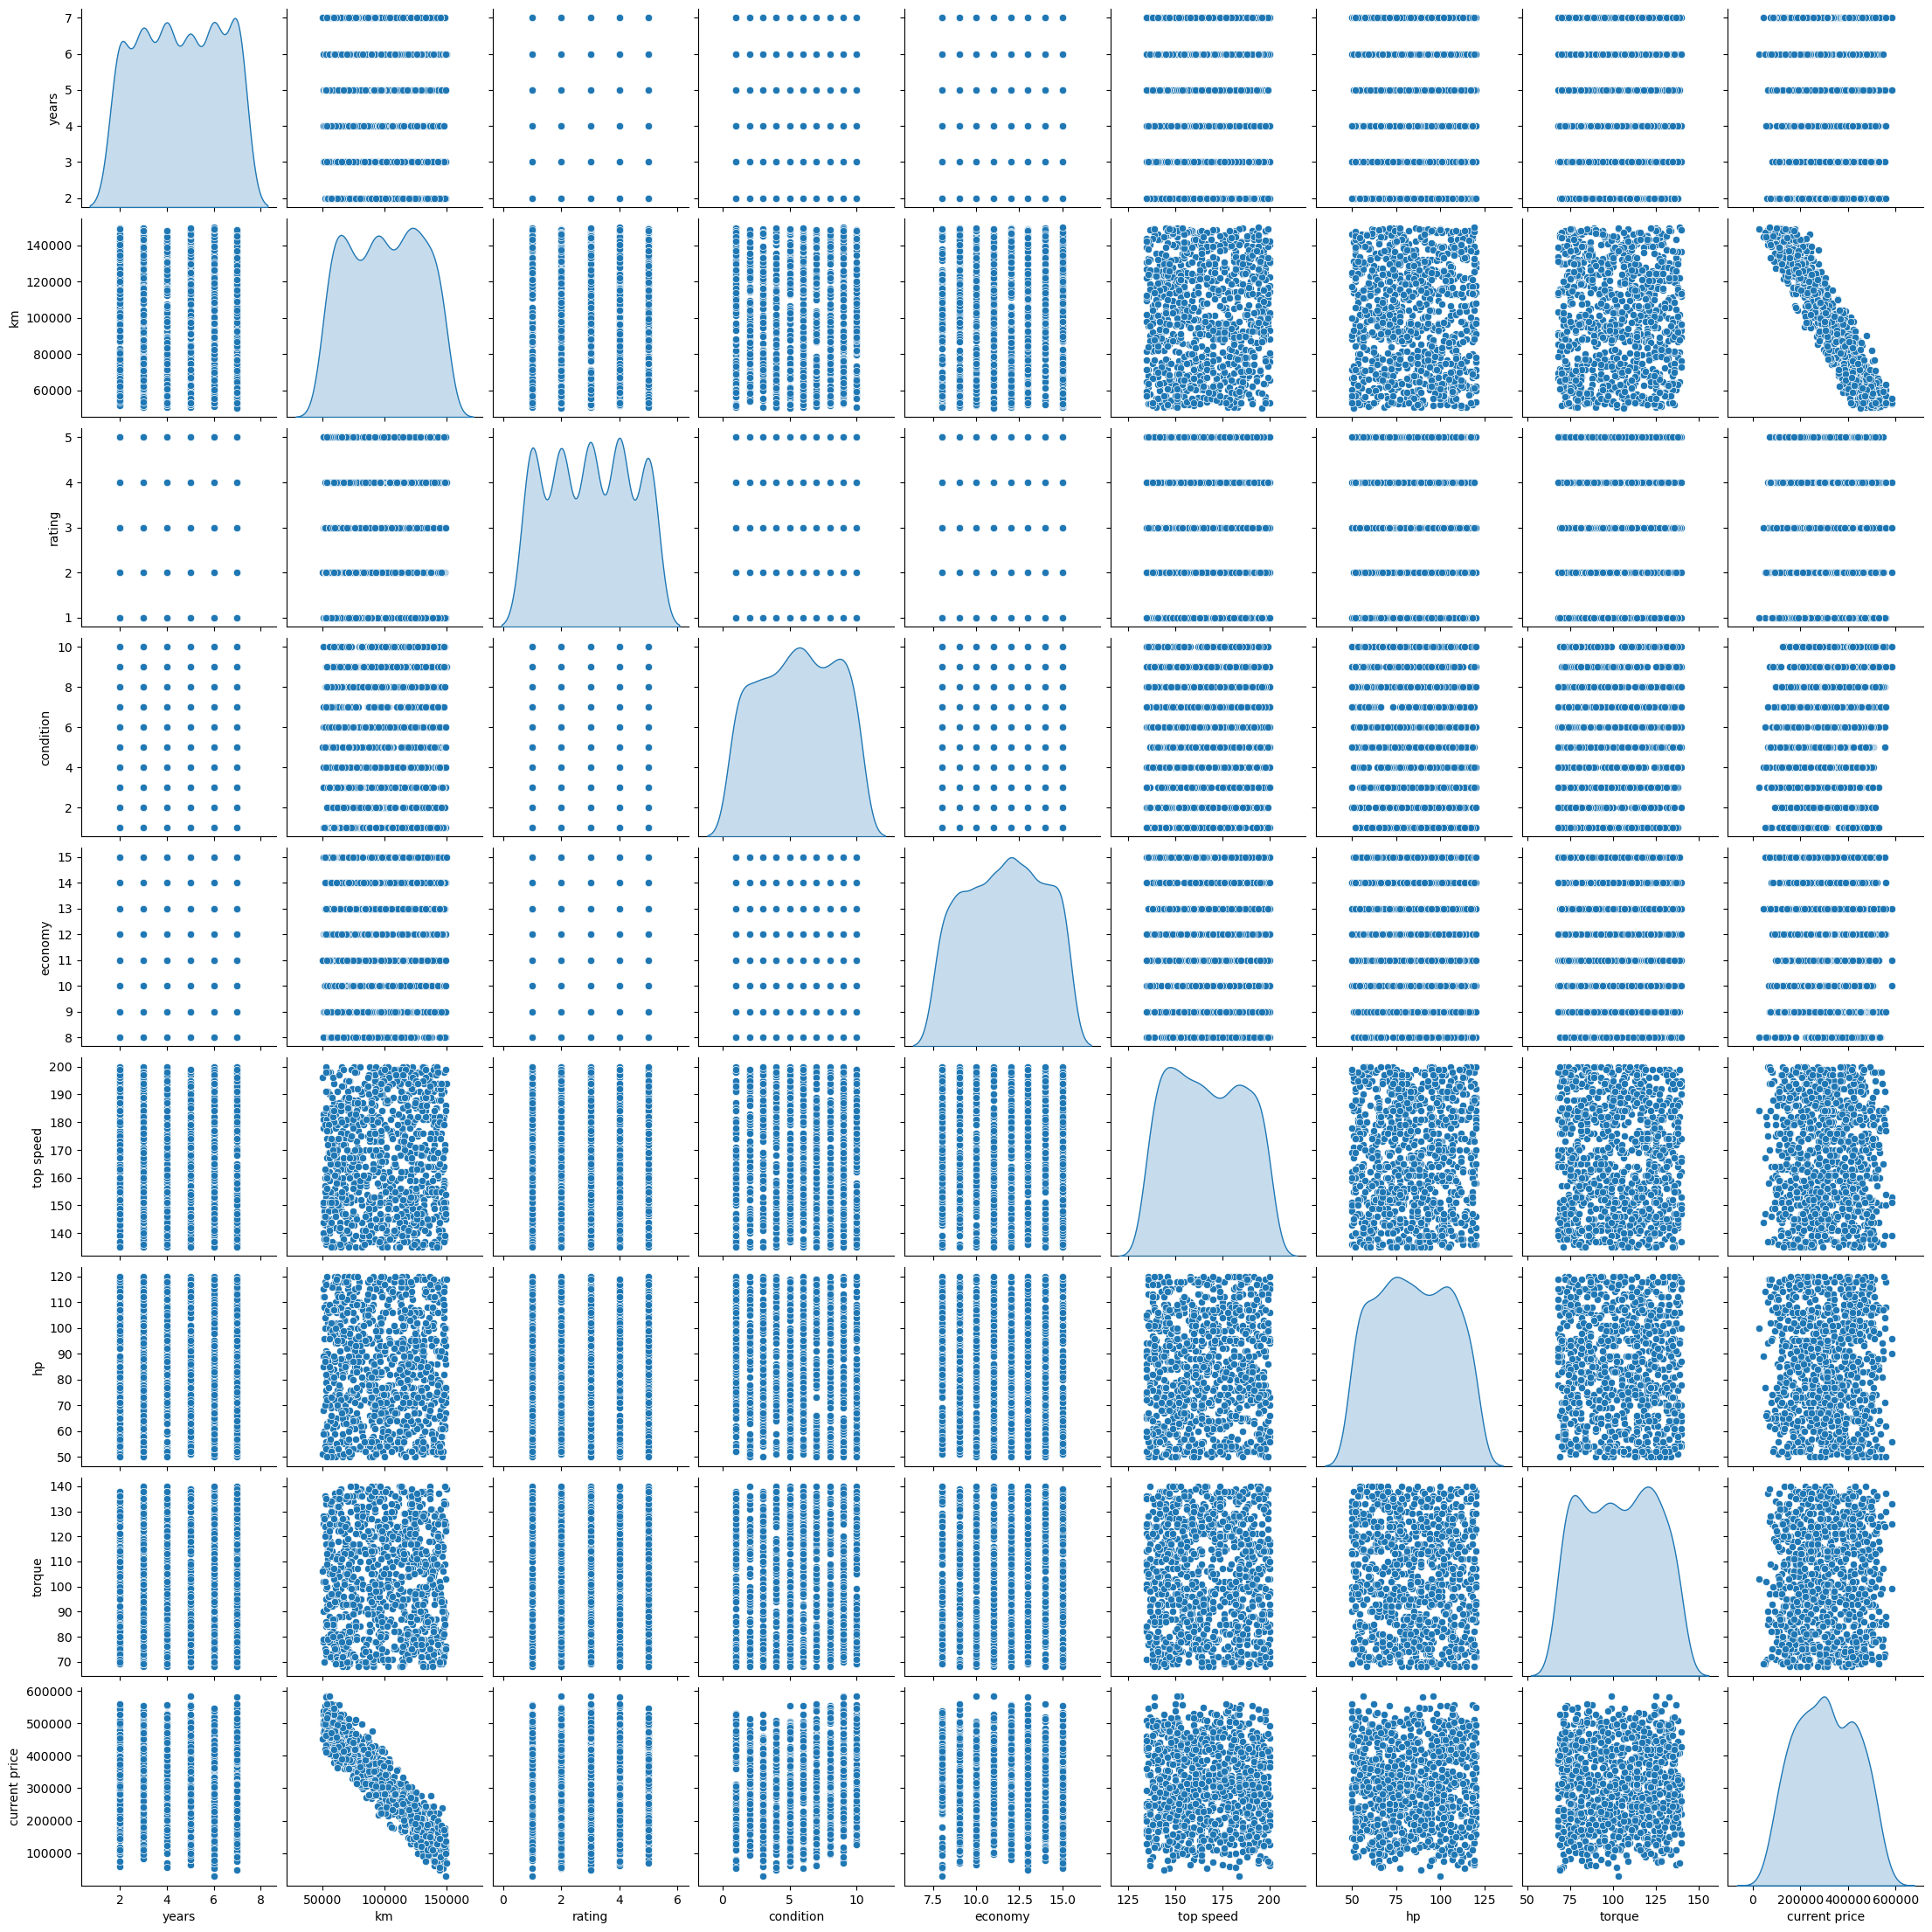

In [3]:
sns.pairplot(data[["years","km","rating", "condition", "economy", "top speed", "hp", "torque", "current price",]],diag_kind = "kde")

In [4]:
tensor_data = tf.constant(data)
tensor_data = tf.cast (tensor_data, tf.float64)
tensor_data = tf.random.shuffle(tensor_data) #shuffle the dataset

In [32]:
x = tensor_data[:,3:-1]
print(x[:3])

tf.Tensor(
[[5.0000e+00 9.2073e+04 5.0000e+00 9.0000e+00 1.1000e+01 1.9500e+02
  6.1000e+01 1.1400e+02]
 [4.0000e+00 5.2443e+04 2.0000e+00 6.0000e+00 1.5000e+01 1.6300e+02
  8.8000e+01 1.2400e+02]
 [6.0000e+00 7.7353e+04 4.0000e+00 8.0000e+00 1.1000e+01 1.8400e+02
  5.3000e+01 8.0000e+01]], shape=(3, 8), dtype=float64)


In [35]:
y = tensor_data[:,-1]
print(y.shape)
y = tf.expand_dims(y,axis =1)
print(y.shape)

(1000,)
(1000, 1)


In [34]:
TRAIN_RATIO =0.8
VAL_RATIO =0.1
TEST_RATIO =0.1
DATASET_SIZE = len(x)
print(len(x))

1000


In [36]:
x_train =x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [83]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [38]:
#for x,y in train_dataset:
 #   print(x,y)
  #  break

In [39]:
x_val =x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [84]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
x_test =x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [85]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset = test_dataset.shuffle(buffer_size= 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [86]:
normalizer = layers.Normalization()
normalizer.adapt(x_train)
normalizer(x)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.2638856 , -0.28104374,  1.4345055 , ...,  1.491871  ,
        -1.1393596 ,  0.5194505 ],
       [-0.31608286, -1.6499448 , -0.7159087 , ..., -0.18394706,
         0.18969855,  0.99437666],
       [ 0.84385407, -0.78950256,  0.7177008 , ...,  0.91580856,
        -1.5331546 , -1.0952985 ],
       ...,
       [ 0.84385407,  0.59729123, -0.7159087 , ...,  1.1776551 ,
         0.9772886 ,  0.4719579 ],
       [-0.31608286, -1.6806526 ,  1.4345055 , ..., -0.9694868 ,
         0.5834936 , -1.5702246 ],
       [ 0.2638856 , -1.2698096 , -1.4327134 , ...,  0.3397461 ,
         0.7803911 ,  1.6592733 ]], dtype=float32)>

In [100]:
model = tf.keras.Sequential(
    [layers.InputLayer(shape =(8,)),
    normalizer,
    layers.Dense(132, activation ="relu"),
    layers.Dense(132, activation ="relu"),
    layers.Dense(132, activation ="relu"),
    layers.Dense(1)   ])

model.build( input_shape =(None,8))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 132)            │         1,188 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 132)            │        17,556 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 132)            │        17,556 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,450 (142.39 KB)

 Trainable params: 36,433 (142.32 KB)

 Non-trainable params: 17 (72.00 B)

In [75]:
#u=utils.plot_model(model,to_file= "model.png",  show_shapes= True)
#print(u)

In [101]:
#model.compile(loss = losses.MeanSquaredError())
model.compile(optimizer=optimizers.Adam(learning_rate=0.1),
                loss = losses.MeanAbsoluteError(),
                metrics =[metrics.RootMeanSquaredError(name=
                        'root_mean_squared_error')] )

In [102]:
history =model.fit(train_dataset,validation_data =val_dataset,epochs =100, verbose =1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 157853.7031 - root_mean_squared_error: 208066.5781 - val_loss: 56003.1016 - val_root_mean_squared_error: 67068.2734
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51713.4609 - root_mean_squared_error: 63802.4492 - val_loss: 43559.7305 - val_root_mean_squared_error: 53944.6602
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51870.7695 - root_mean_squared_error: 65870.4375 - val_loss: 65740.0547 - val_root_mean_squared_error: 78797.5469
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52349.9453 - root_mean_squared_error: 65975.5625 - val_loss: 41916.9805 - val_root_mean_squared_error: 54063.5547
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47438.8906 - root_mean_squared_error: 59916.6133 - val_loss: 41736.9766 - val_root_mean_squared_error: 52765.2617
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47464.2500 - root_mean_squared_error: 60396.3750 - val_loss: 38120.6484 -

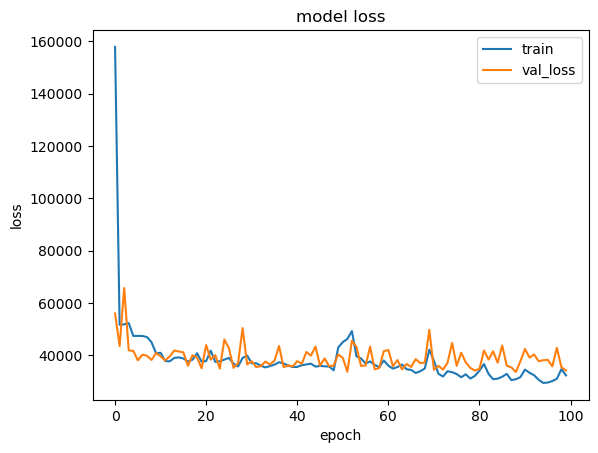

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()


In [104]:
history.history


{'loss': [157853.703125,
  51713.4609375,
  51870.76953125,
  52349.9453125,
  47438.890625,
  47464.25,
  47424.921875,
  47026.2890625,
  45048.80859375,
  40858.75390625,
  40997.84765625,
  37857.5546875,
  37741.98828125,
  39040.8203125,
  39261.48828125,
  38826.7890625,
  37682.8125,
  38351.1796875,
  40842.9296875,
  37606.0625,
  37859.91796875,
  41827.50390625,
  37530.91796875,
  37790.4765625,
  38402.546875,
  39051.62109375,
  36866.30078125,
  35796.6640625,
  39047.24609375,
  39952.84765625,
  37016.46484375,
  37007.7890625,
  36055.62109375,
  35428.59375,
  35924.578125,
  36485.25,
  37400.30859375,
  36948.06640625,
  36134.953125,
  35570.46875,
  35614.8203125,
  36291.26171875,
  36545.0546875,
  36845.58203125,
  35725.17578125,
  35998.84375,
  35832.5390625,
  35777.03125,
  34319.390625,
  43050.109375,
  45095.83984375,
  46302.16015625,
  49310.78125,
  39643.515625,
  38840.4140625,
  36927.609375,
  37679.47265625,
  36388.796875,
  35532.97265625,
 

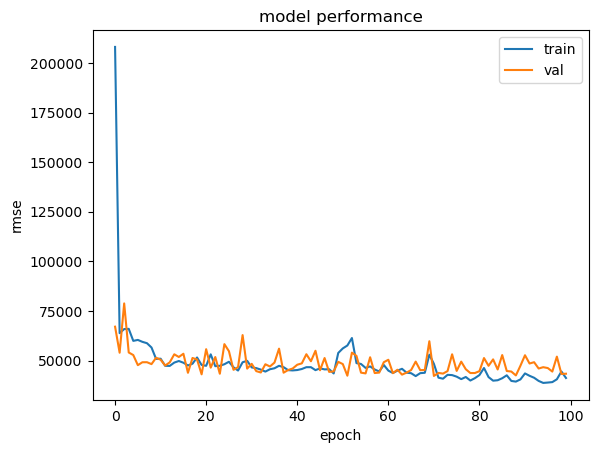

In [105]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("model performance")
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [106]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 41390.3633 - root_mean_squared_error: 51455.2344 


[41390.36328125, 51455.234375]

In [107]:
x_test.shape

TensorShape([100, 8])

In [108]:
m=model.predict(x_test)
print(m.shape)
print(m[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(100, 1)
[195313.95]


In [109]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([159647.])>

In [111]:
y_true = list(y_test[:,0].numpy())

In [55]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[193355.77, 326205.34, 486939.56, 222657.17, 450400.66, 232080.52, 150605.36, 533342.25, 470101.47, 153116.1, 461290.78, 322216.34, 560809.6, 417733.94, 338541.38, 521429.84, 371624.6, 114051.19, 254340.05, 310287.56, 315014.62, 461535.03, 165511.17, 520573.88, 124749.664, 196062.53, 145555.95, 244624.42, 437206.16, 233078.77, 203847.69, 122993.266, 481732.78, 174387.3, 402828.25, 370584.06, 156346.69, 405167.5, 185743.34, 506742.16, 315761.0, 201328.22, 318089.03, 209294.4, 402588.4, 242257.73, 254416.45, 495265.8, 153262.86, 453792.1, 195700.06, 176744.14, 311055.66, 235577.95, 528326.1, 235873.56, 345899.1, 245884.12, 164961.58, 464708.3, 142583.64, 397554.28, 462387.9, 190823.7, 114983.93, 404128.1, 195296.14, 441468.7, 448772.28, 182275.28, 132775.17, 323561.94, 203927.34, 369054.84, 373273.34, 385913.94, 395019.34, 473278.66, 473730.8, 464480.7, 495270.66, 355576.22, 153998.27, 229707.12, 393332.56, 178804.19, 357606.03, 162146.64, 186981.94,

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

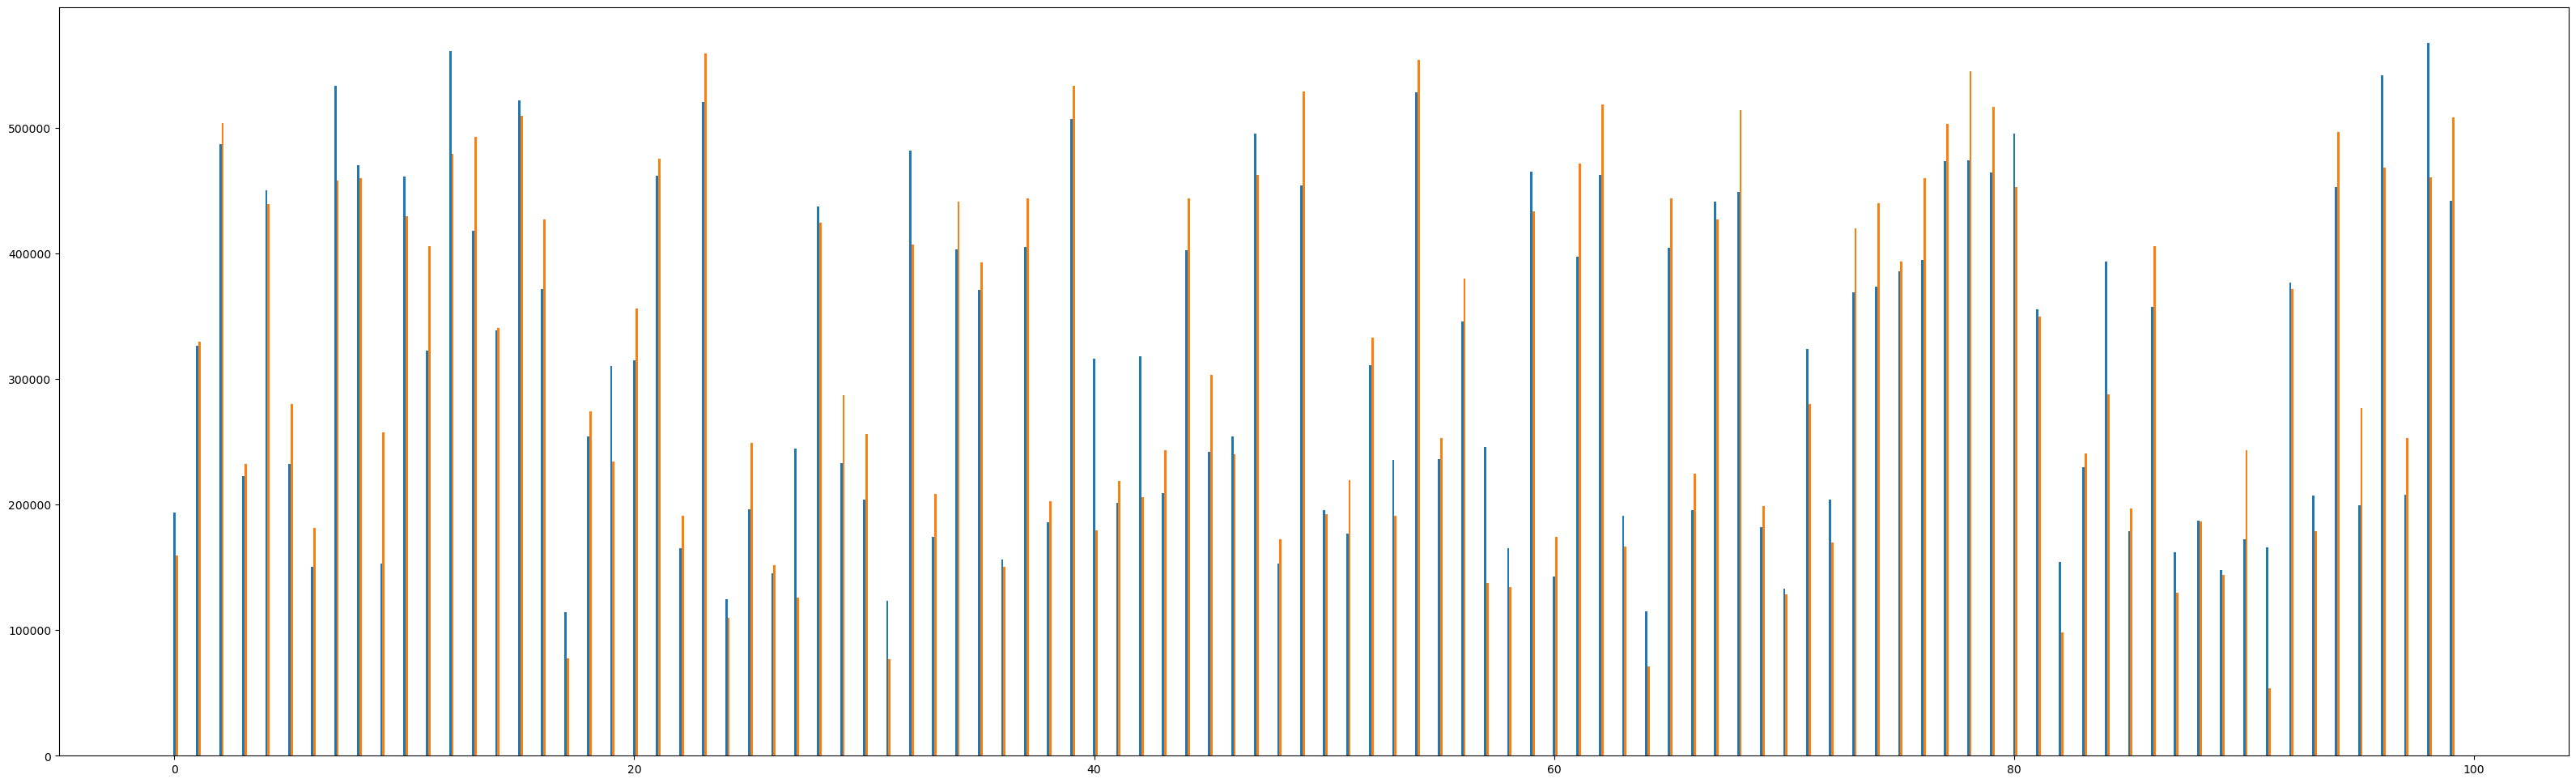

In [112]:
ind = np.arange(100)
plt.figure(figsize=(40,12))

width =0.1

plt.bar(ind,y_pred, width, label= "predictecd car price")
plt.bar(ind+width,y_true, width, label= "actual car price")

plt.xlable("actual vs predicted prices")
plt.ylable('Car price prices')

plt.show()